## 最小二乗法（１次元）
$$
y=ax+b\\
\,\\
F \equiv \sum_{i=1}^n(y_i - ax_i -b)^2\\
=\sum_{i=1}^n(y_i^2 -2ax_iy_i -2by_i +a^2x_i^2 +2abx_i +b^2)\\
$$
$F$が最小になるようにパラメータ$a,b$を選ぶ
$$
\frac{\partial F}{\partial a}=0\\
\frac{\partial F}{\partial b}=0\\
\,\\
\frac{\partial F}{\partial a}=2a\sum_i x_i^2 -2a\sum_i x_iy_i +2b\sum_ix_i = 0\\
\frac{\partial F}{\partial b}=2a\sum_ix_i -2\sum_i y_i +2nb = 0\\
$$
これを解くと
$$
\Rightarrow a = \frac{\sum_ix_i\sum_iy_i -n\sum_ix_iy_i}{(\sum_ix_i)^2 -n\sum_ix_i^2}\\
b = \frac{1}{n}\sum_i(y_i - ax_i)\\
$$



a = 0.9939393939393939
b = 0.9333333333333336


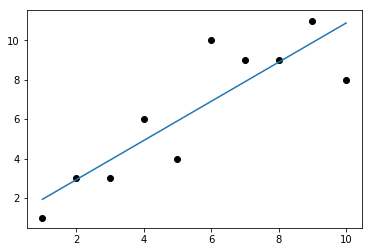

In [3]:
#一次元
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([1,3,3,6,4,10,9,9,11,8])

def reg1dim(x,y):
    n = len(x)
    a = ((np.dot(x,y) - y.sum()*x.sum()/n)/((x**2).sum() - x.sum()**2/n))
    b = (y.sum() - a*x.sum())/n
    return a, b

a,b = reg1dim(x,y)

print("a =",a)
print("b =",b)
plt.scatter(x,y,color='k')
plt.plot(x,a*x +b)
plt.show()

## 2次元の場合
1次元と同じように$F$を最小にするようなパラメータを求める
$$
F \equiv \sum_{i=1}^n(y_i -ax_i^2 -bx_i -c)^2
$$
$F$の$a,b,c$についての偏微分が$0$になれば良いので
$$
\frac{\partial F}{\partial a}=0\\
\frac{\partial F}{\partial b}=0\\
\frac{\partial F}{\partial c}=0\\
\quad\\
\Rightarrow \begin{array}
 \sum_i-2(y_i -ax_i^2 -bx_i -c)x_i^2 = 0\\
 \sum_i-2(y_i -ax_i^2 -bx_i -c)x_i = 0\\
 \sum_i-2(y_i -ax_i^2 -bx_i -c) = 0
\end{array}\\
$$まとめると$$
\begin{pmatrix}
 \sum_ix_i^4 & \sum_ix_i^3 &\sum_ix_i^2\\
 \sum_ix_i^3 & \sum_ix_i^2 &\sum_ix_i\\
 \sum_ix_i^2 & \sum_ix_i &n
\end{pmatrix}
\begin{pmatrix}
  a\\b\\c\\
\end{pmatrix}
= 
\begin{pmatrix}
  \sum_iy_ix_i^2\\\sum_iy_ix_i\\\sum_iy_i
\end{pmatrix}\\
$$
$X=\begin{pmatrix}
      x_1^2&x_1&1\\
      x_2^2&x_2&1\\
      \vdots&\vdots&\vdots\\
      x_n^2&x_n&1
   \end{pmatrix},
Y=\begin{pmatrix}y_1\\y_2\\\vdots\\y_n\end{pmatrix},A=\begin{pmatrix}a\\b\\c\end{pmatrix}
$とすると上の式は次のようにかける
$$X^TXA=X^TY$$
よって$$XA=Y$$が解ければパラメータ$a,b,c$が得られ、関数の次数が増えても同じ方程式を解けばパラメータが得られる。
$$
\quad\\
y = a_nx^n + a_{n-1}x^{n-1} +\dots +a_0\\
\quad\\
\begin{pmatrix}
 \sum_ix_i^{2n} &\sum_ix_i^{2n-1} &\dots &\sum_ix_i^{n}\\
 \sum_ix_i^{2n-1} &\sum_ix_i^{2n-2} &\dots &\sum_ix_i^{n-1}\\
 \vdots &\vdots &\quad &\vdots\\
 \sum_ix_i^{n} &\sum_ix_i^{n-1} &\dots &1
\end{pmatrix}
\begin{pmatrix}
 a_n\\a_{n-1}\\\vdots\\a_0
\end{pmatrix}
=
\begin{pmatrix}
 \sum_iy_ix_i^n\\ \sum_iy_ix_i^{n-1}\\ \vdots\\ \sum_iy_i
\end{pmatrix}
$$

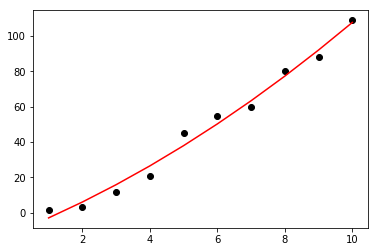

parameter [[  0.41363636]
 [  7.75242424]
 [-11.11333333]]


In [2]:
#2次
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([1.3,3.2,12,21,45,55,60,80,88,109])

x4 = (x**4).sum()
x3 = (x**3).sum()
x2 = (x**2).sum()
x1 = x.sum()
yxx = np.dot(y,(x**2))
yx = np.dot(y,x)
y1 = y.sum()
n = len(x)

X = np.array([[x4,x3,x2],[x3,x2,x1],[x2,x1,n]])#行列を定義
Y = np.array([[yxx],[yx],[y1]])
in_X = np.linalg.inv(X)

par_A =np.dot(in_X,Y)

plt.scatter(x,y,color='k')
plt.plot(x,par_A[0]*x**2 + par_A[1]*x +par_A[2],color="r")
plt.show()
print("parameter",par_A)